## Imports

In [1]:
import os
import math
import obspy
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from datetime import timedelta
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from earthquake import earthquake
import util
import pandas as pd

## Get set up
Set path to data, and read eq_list (all folders in root folder)

In [3]:
#root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'

eq_list = os.listdir(root)

Open catalog of events

In [4]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

Not all events had suitable data, look through all events and make a list of ones which have data (eq_with_data) and were successfully picked

In [5]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [6]:
#len(cat_with_data)

In [6]:
#cat.plot()


In [7]:
#cat_with_data.plot()

In [8]:
%%script false --no-raise-error
cat[0].magnitudes[0].mag
mags = []
mags_d = []
for e in cat:
    mags.append(e.magnitudes[0].mag)
for e in cat_with_data:
    mags_d.append(e.magnitudes[0].mag)    
plt.hist(mags, np.arange(3, 8, 0.1))
plt.hist(mags_d, np.arange(3, 8, 0.1))
plt.yscale('log')

## the action!!
For all events with data, load the data and then create an earthquake object. work out tp_max and tc, and add to lists (for plotting)

In [2]:
df =  pd.read_pickle('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/dataframe_highpass_0_075Hz.pkl')

In [3]:
list_mags = df['magnitude']
list_tpmax = df['tpmax']
list_tc = df['tc']

## plotting
### tp and tc subplots
exclude points more than 1 std from the mean at each station. plot individual stations and the median of each station. 

make plot log-log

set up function for scipy line fitting

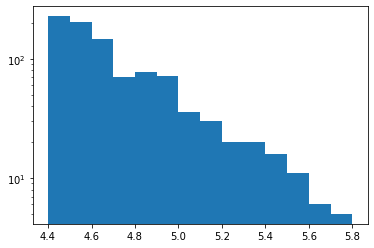

In [106]:
n, bins, patches = plt.hist(list_mags, np.arange(4.4, 5.9, 0.1))
plt.yscale('log')

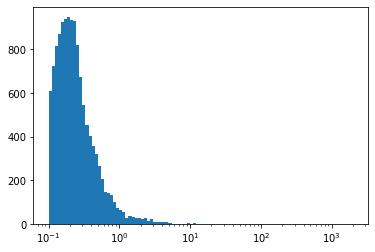

In [107]:
tp_use = []
for i in list_tpmax:
    if i != []:
        for j in i:
            tp_use.append(j)
n, bins, patches = plt.hist(tp_use, np.logspace(-1, 3.3, num=100))
min(tp_use)
max(tp_use)
plt.xscale('log')

In [108]:
max(n)

948.0

In [5]:
def model_function(x_data, a, b):
    return 10**(a*x_data + b)

In [6]:
def model_function_2(x_data, a, b):
    return a*x_data + b

In [111]:
eq_name = '20190131_130350.a'
data = obspy.read(root+eq_name+'/data/*/*')
data.plot()
inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
data.remove_response(inv)
data.plot()

NameError: name 'root' is not defined

plot directly in log space

In [112]:
t = []
for mag_lim in np.arange(3, 5, 0.1):
    t.append(mag_lim)
type(t[0])

numpy.float64

/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

3.0 [-0.06939532  0.03119629]
3.1 [-0.03130875 -0.13387723]
3.2 [ 0.00425391 -0.28997356]
3.3 [ 0.03843532 -0.44181257]
3.4 [ 0.09500891 -0.69522987]
3.5 [ 0.12939302 -0.85038391]
3.6 [ 0.15787819 -0.97998115]
3.7 [ 0.20121265 -1.17833013]
3.8 [ 0.22509497 -1.28857092]
3.9 [ 0.24177443 -1.36612653]
4.0 [ 0.25018631 -1.40558071]
4.1 [ 0.28219921 -1.55730399]
4.2 [ 0.28648914 -1.5778879 ]
4.3 [ 0.31772005 -1.73035601]
4.4 [ 0.40008678 -2.13908478]
4.4 [ 0.40008678 -2.13908478]
inif
4.5 [ 0.38191192 -2.04689786]
4.6 [ 0.41262842 -2.20498684]
4.7 [ 0.47022098 -2.50538899]
4.8 [ 0.47706159 -2.54100307]


/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/rebecca/opt/anaconda3/envs/pandas/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret 

4.9 [ 0.41066023 -2.18563444]


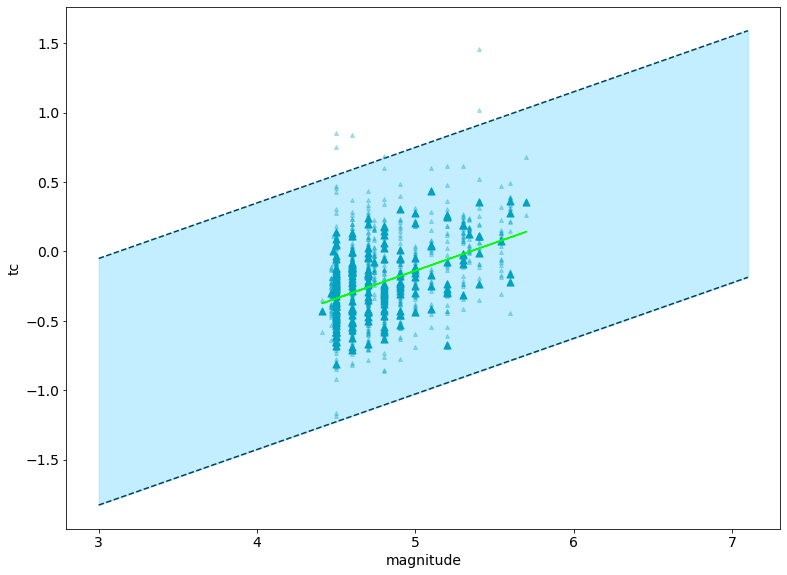

In [10]:

import matplotlib.pyplot as plt
cs = ['#00a1c1']
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tp = []
y_aves_tc = []
x_aves_tp = []
x_aves_tc = []
count = 1
eq_count = 0
for mag_lim in np.arange(3,5, 0.1):
    #print(mag_lim)
    y_aves_tp = []
    y_aves_tc = []
    x_aves_tp = []
    x_aves_tc = []
    for i  in range(0, len(list_mags)):
        if list_mags[i] > mag_lim and list_mags[i]<5.8:
            mean_tc = np.mean(list_tc[i]) 
            std_tc = np.std(list_tc[i]) 
            y_tc = [] 
            for k in list_tc[i]: 
                if k > mean_tc-2*std_tc and k < mean_tc + 2*std_tc:# and k < 100: 
                    y_tc.append(math.log(k, 10)) 
            x_tc = np.zeros(len(y_tc))  
            x_tc = x_tc + list_mags[i]
            c = 0
            if str(mag_lim) == str(4.4):# or mag_lim == 3:
                #print('in if')
                if len(x_tc)>0:
                    if np.median(y_tc):
                        axs.scatter(x_tc, y_tc, s = 15, alpha = 0.3, c = cs[c], marker = '^', zorder =3) 
                        axs.scatter(list_mags[i], np.median(y_tc), s = 50, c = cs[c], marker = '^', zorder =4)
                        #axs[1].scatter(list_mags[i], np.mean(y_tc), s = 50, c = cs[c], marker = 'o')
                    #FOR CURVE FITTING
            if math.isnan(np.median(y_tc))==False:
                y_aves_tc.append(np.median(y_tc))
                x_aves_tc.append(list_mags[i])
    #popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp)
    #print(mag_lim, popt)
    #axs[0].plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color = 'k', alpha = count/21, zorder =10)
    popt, pcov = curve_fit(model_function_2, x_aves_tc, y_aves_tc)
    print(mag_lim, popt)
    #axs.plot(np.array(x_aves_tc), model_function_2(np.array(x_aves_tc), *popt), color = 'k', alpha = count/21, zorder =10)
    if str(mag_lim) == str(4.4):
        popt, pcov = curve_fit(model_function_2, x_aves_tc, y_aves_tc, absolute_sigma = True)
        print(mag_lim, popt)
        axs.plot(np.array(x_aves_tc), model_function_2(np.array(x_aves_tc), *popt), color = 'lime', zorder =100)
        print('inif')
        perr = np.sqrt(np.diag(pcov))
        x_me = np.arange(3, 7.2, 0.1)
        x_lower_me = x_me - perr[1]*2
        x_upper_me =  x_me + perr[1]*2
        y_me = popt[0]*x_me+popt[1]
        y_lower_me = popt[0]*x_lower_me+popt[1]
        y_upper_me = popt[0]*x_upper_me+popt[1]
        #axs[0].plot(x, y_me, color = '')
        axs.fill_between(x_me, model_function_2(np.array(x_lower_me), *popt), model_function_2(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
        axs.plot(x_me, model_function_2(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
        axs.plot(x_me, model_function_2(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
        
            # add 2 * std banding
    #axs[0].set_ylim([0.2,2])
    #axs[0].set_yscale('log')
    #axs[1].set_yscale('log')
    count += 1


axs.set_xlabel("magnitude", fontsize = 14) 
axs.set_ylabel("tc", fontsize =14)
axs.tick_params(axis='both', which='major', labelsize=14)
axs.tick_params(axis='both', which='minor', labelsize=14)
#axs.set_title("tc") 
#fig.suptitle("median = triangle")
#axs.set_ylim(-1, 1)

In [20]:
eq_count = 0
for i  in range(0, len(list_mags)):
    if list_mags[i] > mag_lim and list_mags[i]<5.8:
        eq_count += 1
print(eq_count)

144


In [21]:
f = open('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/olson_dataset_csv_gr.csv') #'/home/earthquakes1/homes/Rebecca/phd/seismo_det/olson_dataset_csv_gr.csv')
a = f.read()
b = a.split('\n')
c = []
for i in b[1:]:
    if i!='':
        c.append(i.split(','))
m_olsen_gr = []
tp_olsen_gr = []
for j in c:
    if float(j[3]):
        m_olsen_gr.append(float(j[3]))
        tp_olsen_gr.append(math.log(float(j[6]), 10))
f = open('/Users/rebecca/Documents/PhD/Research/Frequency/seismo_det/olson_dataset_csv.csv') #'/home/earthquakes1/homes/Rebecca/phd/seismo_det/olson_dataset_csv_gr.csv')
a = f.read()
b = a.split('\n')
c = []
for i in b[1:]:
    if i!='':
        c.append(i.split(','))
m_olsen = []
tp_olsen = []
for j in c:
    if float(j[3]):
        m_olsen.append(float(j[3]))
        tp_olsen.append(math.log(float(j[6]), 10))

In [22]:
axs[0].scatter(m_olsen, tp_olsen, c = 'k', marker = 'x', zorder = 20)
popt, pcov = curve_fit(model_function_2, m_olsen, tp_olsen)
axs[0].plot(np.array(m_olsen), model_function_2(np.array(m_olsen), *popt), color = 'k', zorder =10)

TypeError: 'AxesSubplot' object is not subscriptable

[ 0.41066023 -2.18563444]


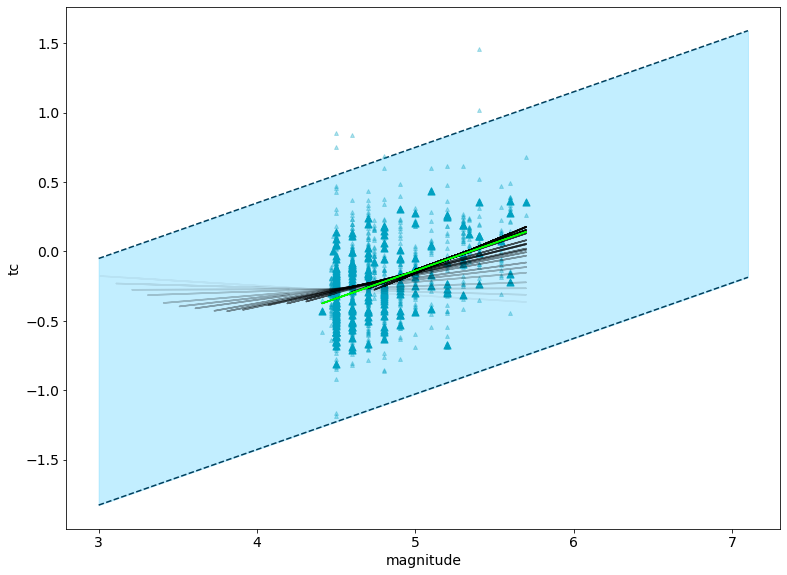

In [23]:
print(popt)
fig

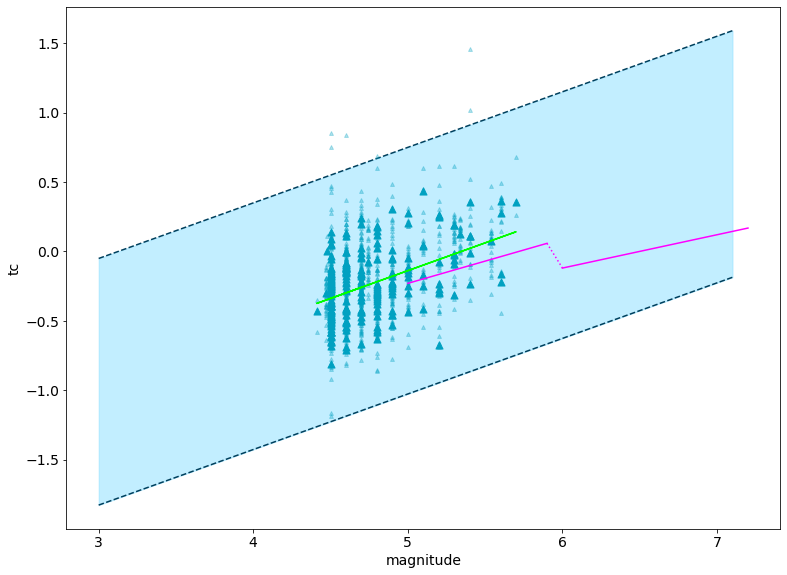

In [11]:

x_lan_tc_1 = np.arange(5, 6, 0.1) #valid 4--6
x_lan_tc_2 = np.arange(6, 7.2, 0.1) # valid 6--8
y_lan_tc_1 = 0.32*x_lan_tc_1-1.83
y_lan_tc_2 = 0.24*x_lan_tc_2-1.56
axs.plot(x_lan_tc_1, y_lan_tc_1, color = 'magenta', zorder =100)
axs.plot([x_lan_tc_1[-1], x_lan_tc_2[0]], [y_lan_tc_1[-1],y_lan_tc_2[0]], color = 'magenta', linestyle = ':',zorder =100)
axs.plot(x_lan_tc_2, y_lan_tc_2, color = 'magenta', zorder =100)
fig

In [28]:
axs.set_title('tc highpass filtered at 0.075 Hz', fontsize = 14)
fig.savefig('tc_highpass_filtered')

use scipy curve_fit to add my own line of best fit

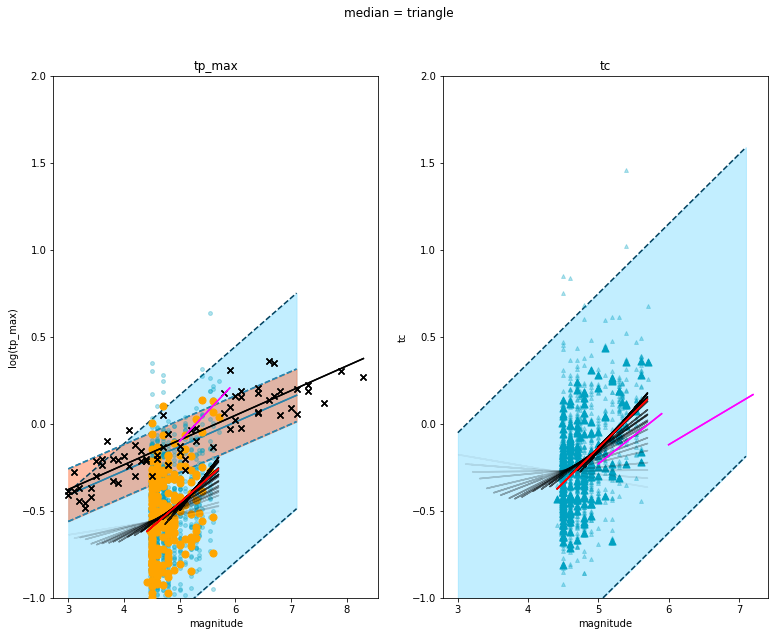

In [128]:
#%%capture
# plot my own line of best fit
popt, pcov = curve_fit(model_function_2, x_aves_tp, y_aves_tp)
axs[0].plot(np.array(x_aves_tp), model_function_2(np.array(x_aves_tp), *popt), color='#003f5c', zorder =2)


fig # show updated figure

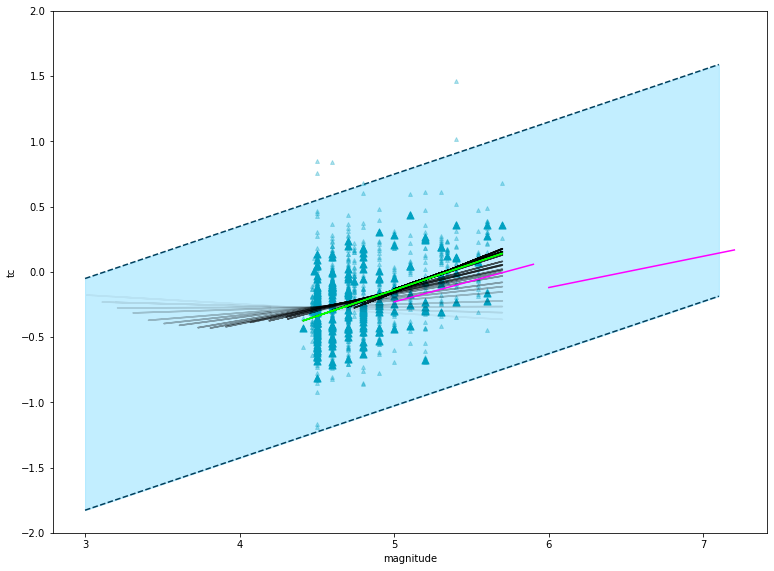

In [18]:
# plot my own line of best fit for tc
popt_tc, pcov_tc = curve_fit(model_function_2, x_aves_tc, y_aves_tc)
axs.plot(np.array(x_aves_tc), model_function_2(np.array(x_aves_tc), *popt_tc), color='#003f5c', zorder =2)

# add 2 * std banding

perr = np.sqrt(np.diag(pcov_tc))
x_me_tc = np.arange(5, 7.2, 0.1)
x_lower_me_tc = x_me_tc - 0.2642707*2
x_upper_me_tc =  x_me_tc + 0.2642707*2
#y_me_tc = 10**(0.14*x-0.83)
#y_lower_me_tc = 10**(0.14*x_lower-0.83)
#y_upper_me_tc = 10**(0.14*x_upper-0.83)
#axs[0].plot(x, y_me, color = '')
#axs[1].fill_between(x_me_tc, model_function(np.array(x_lower_me_tc), *popt_tc), model_function(np.array(x_upper_me_tc), *popt_tc), color = '#8adfff', alpha = 0.52, zorder =1)
#axs[1].plot(x_me_tc, model_function(np.array(x_lower_me_tc), *popt_tc), color = '#003f5c', linestyle = '--', zorder =2)
#axs[1].plot(x_me_tc, model_function(np.array(x_upper_me_tc), *popt_tc), color = '#003f5c', linestyle = '--', zorder =2)

#axs[0].set_ylim([-1,2])
axs.set_ylim([-2,2])
fig # show updated figure

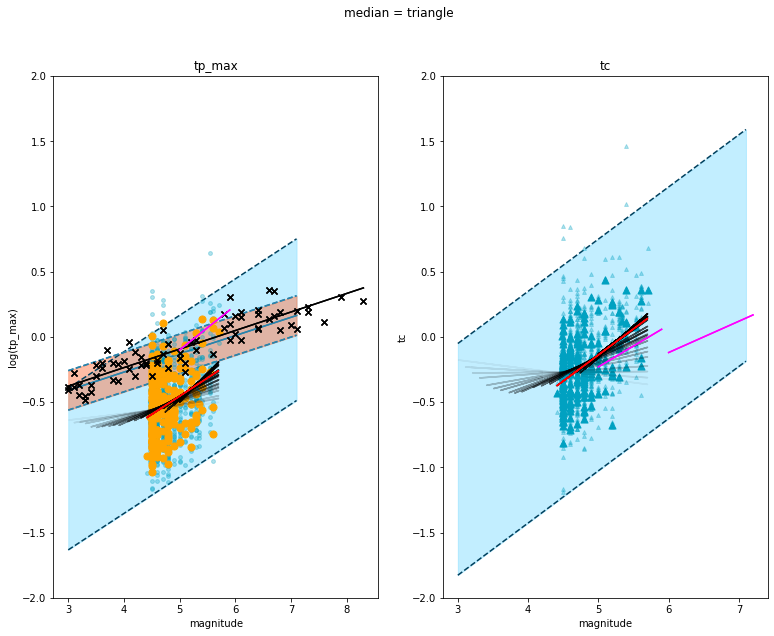

In [131]:
axs[0].set_ylim([-2,2])
axs[1].set_ylim([-2,2])
fig

In [122]:
    mean_tp = np.mean(list_tpmax[i]) 
    std_tp = np.std(list_tpmax[i]) 
    y_tp = [] 
    for j in list_tpmax[i]: 
        if j > mean_tp-std_tp and j < mean_tp + std_tp and j < 10: 
            y_tp.append(math.log(j, 10))

KeyError: ''

In [ ]:
list_tpmax[i]

Now I'll plot tpmax and tc on the same graph because the slopes seem very similar so want to check they are a bit different...

In [ ]:
%%capture
cs = ['#00a1c1']
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
y_aves_tp = []
y_aves_tc = []
x_aves = []
x_aves_tc = []

for i  in range(0, len(list_mags)):  
    mean_tp = np.mean(list_tpmax[i]) 
    std_tp = np.std(list_tpmax[i]) 
    y_tp = [] 
    for j in list_tpmax[i]: 
        if j > mean_tp-std_tp and j < mean_tp + std_tp and j < 10: 
            y_tp.append(j) 
    x_tp = np.zeros(len(y_tp))  
    x_tp = x_tp + list_mags[i]  

    mean_tc = np.mean(list_tc[i]) 
    std_tc = np.std(list_tc[i]) 
    y_tc = [] 
    for k in list_tc[i]: 
        if k > mean_tc-std_tc and k < mean_tc + std_tc and k < 10: 
            y_tc.append(k) 
    x_tc = np.zeros(len(y_tc))  
    x_tc = x_tc + list_mags[i]
    c = 0
    if len(x_tp)>0 or len(x_tc)>0:
        axs.scatter(x_tp, y_tp, s = 15, alpha = 0.3, c = cs[c], marker = '^', zorder =3) 
        #axs[0].scatter(list_mags[i], np.mean(y_tp), s = 50, c = cs[c], marker = 'o')
        axs.scatter(list_mags[i], np.median(y_tp), s = 50, c = cs[c], marker = '^', zorder =4)
        axs.scatter(x_tc, y_tc, s = 15, alpha = 0.3, c = 'coral', marker = '*', zorder =3) 
        axs.scatter(list_mags[i], np.median(y_tc), s = 50, c = 'coral', marker = '*', zorder =4)
        #axs[1].scatter(list_mags[i], np.mean(y_tc), s = 50, c = cs[c], marker = 'o')
        #FOR CURVE FITTING
        if math.isnan(np.median(y_tp))==False:
            y_aves_tp.append(np.median(y_tp))
            x_aves.append(list_mags[i])
        if math.isnan(np.median(y_tc))==False:
            y_aves_tc.append(np.median(y_tc))
            x_aves_tc.append(list_mags[i])

axs.set_yscale('log')
axs.set_xlabel("magnitude") 
axs.set_ylabel("tp_max (^), tc (*)") 
fig.suptitle("median = triangle")

In [ ]:
%%capture
# plot my own line of best fit
popt, pcov = curve_fit(model_function, x_aves, y_aves_tp)
axs.plot(np.array(x_aves), model_function(np.array(x_aves), *popt), color='#008bad', zorder =2)

# add 2 * std banding

perr = np.sqrt(np.diag(pcov))
x_me = np.arange(5, 7.2, 0.1)
x_lower_me = x_me - 0.2642707*2
x_upper_me =  x_me + 0.2642707*2
y_me = 10**(0.14*x-0.83)
y_lower_me = 10**(0.14*x_lower-0.83)
y_upper_me = 10**(0.14*x_upper-0.83)
#axs[0].plot(x, y_me, color = '')
#axs.fill_between(x, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
axs.plot(x, model_function(np.array(x_lower_me), *popt), color = '#008bad', linestyle = '--', zorder =2)
axs.plot(x, model_function(np.array(x_upper_me), *popt), color = '#008bad', linestyle = '--', zorder =2)

# fig # show updated figure

In [ ]:
# plot my own line of best fit for tc
popt_tc, pcov_tc = curve_fit(model_function, x_aves_tc, y_aves_tc)
axs.plot(np.array(x_aves), model_function(np.array(x_aves), *popt_tc), color='coral', zorder =2)

# add 2 * std banding

perr = np.sqrt(np.diag(pcov_tc))
x_me_tc = np.arange(5, 7.2, 0.1)
x_lower_me_tc = x_me_tc - 0.2642707*2
x_upper_me_tc =  x_me_tc + 0.2642707*2
#y_me_tc = 10**(0.14*x-0.83)
#y_lower_me_tc = 10**(0.14*x_lower-0.83)
#y_upper_me_tc = 10**(0.14*x_upper-0.83)
#axs[0].plot(x, y_me, color = '')
#axs.fill_between(x, model_function(np.array(x_lower_me_tc), *popt_tc), model_function(np.array(x_upper_me_tc), *popt_tc), color = '#8adfff', alpha = 0.52, zorder =1)
axs.plot(x, model_function(np.array(x_lower_me_tc), *popt_tc), color = 'coral', linestyle = '--', zorder =2)
axs.plot(x, model_function(np.array(x_upper_me_tc), *popt_tc), color = 'coral', linestyle = '--', zorder =2)

fig # show updated figure

They are different, yay! 


In [ ]:
# %%script false --no-raise-error
fig.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/tp_and_tc/2019_m3_plus.png', transparent=True)

### importance of filtering
turns out i only highpass filter if have acceleration data, so don't need this...

In [ ]:
%%script false --no-raise-error
list_tpmax_2 = []
list_mags_2 = []
list_tc_2= []
eqs_2 = {}
count = 0
for eq_name in eq_with_data:
    
    d = util.filenameToDate(eq_name)
    
    filter_start = str(UTCDateTime(d-timedelta(seconds=1)))
    filter_stop = str(UTCDateTime(d+timedelta(seconds=1)))
    
    event = cat.filter('time > ' + filter_start, 'time < ' + filter_stop)
    # print(event)
    data = obspy.read(root+eq_name+'/data/*/*')
    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    obj_name = eq_name[0:-2]
    eqs_2[obj_name] = earthquake(eq_name, event, data, picks, sensor_types = [])
    eqs_2[obj_name].calc_Tpmax(freq_cut_off=0.01, filter_corners = 4)
    eqs_2[obj_name].calc_Tc()
    list_tpmax_2.append(eqs[obj_name]._cached_params["tau_p_max"])
    list_tc_2.append(eqs[obj_name]._cached_params["tau_c"])
    list_mags_2.append(eqs[obj_name].event.magnitudes[0].mag)
    print('earthquake number ' + str(count) + ' done. It was ' + eq_name)
    count += 1

In [ ]:
%%script false --no-raise-error
cs = ['#000000']
fig, axs = plt.subplots(1,2, figsize=(12.8,9.6))
y_aves = []
x_aves = []
y_aves_2 = []
x_aves_2 = []
for i  in range(0, len(list_mags)):  
    mean_tp = np.mean(list_tpmax[i]) 
    std_tp = np.std(list_tpmax[i]) 
    y_tp = [] 
    for j in list_tpmax[i]: 
        if j > mean_tp-std_tp and j < mean_tp + std_tp and j < 10: 
            y_tp.append(j) 
    x_tp = np.zeros(len(y_tp))  
    x_tp = x_tp + list_mags[i]  

    mean_tp_2 = np.mean(list_tpmax_2[i]) 
    std_tp_2 = np.std(list_tpmax_2[i]) 
    y_tp_2 = [] 
    for j in list_tpmax_2[i]: 
        if j > mean_tp_2-std_tp_2 and j < mean_tp_2 + std_tp_2 and j < 10: 
            y_tp_2.append(j) 
    x_tp_2 = np.zeros(len(y_tp))  
    x_tp_2 = x_tp_2 + list_mags_2[i] 
    c = 0
    if len(x_tp)>0 or len(x_tp_2)>0:
        axs[0].scatter(x_tp, y_tp, s = 15, alpha = 0.2, c = cs[c], marker = '^') 
        #axs[0].scatter(list_mags[i], np.mean(y_tp), s = 50, c = cs[c], marker = 'o')
        axs[0].scatter(list_mags[i], np.median(y_tp), s = 50, c = cs[c], marker = '^')
        axs[1].scatter(x_tp_2, y_tp_2, s = 15, alpha = 0.2, c = cs[c], marker = '^') 
        axs[1].scatter(list_mags_2[i], np.median(y_tp_2), s = 50, c = cs[c], marker = '^')
        #axs[1].scatter(list_mags[i], np.mean(y_tc), s = 50, c = cs[c], marker = 'o')
        #FOR CURVE FITTING
        if math.isnan(np.median(y_tp))==False:
            y_aves.append(np.median(y_tp))
            x_aves.append(list_mags[i])
        if math.isnan(np.median(y_tp_2))==False:
            y_aves_2.append(np.median(y_tp_2))
            x_aves_2.append(list_mags_2[i])

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_xlabel("magnitude") 
axs[1].set_xlabel("magnitude") 
axs[0].set_ylabel("tp_max") 
axs[1].set_ylabel("tc")
axs[0].set_title("tp_max") 
axs[1].set_title("tc") 
fig.suptitle("median = triangle")

add line of best fit from olsen and allen 2005, with 2x absolute deviation band

In [ ]:
%%script false --no-raise-error
#plot line of best fit from olsen and allen 2005
x = np.arange(5, 7.2, 0.1)
x_lower = x - 0.54*2
x_upper =  x + 0.54*2
y = 10**(0.14*x-0.83)
y_lower = 10**(0.14*x_lower-0.83)
y_upper = 10**(0.14*x_upper-0.83)
axs[0].plot(x, y, color = 'red')
axs[0].plot(x, y_lower, color = 'red', linestyle = '--')
axs[0].plot(x, y_upper, color = 'red', linestyle = '--')
fig

use scipy curve_fit to add my own line of best fit

In [ ]:
%%script false --no-raise-error
# plot my own line of best fit
popt, pcov = curve_fit(model_function, x_aves, y_aves)
axs[0].plot(np.array(x_aves), model_function(np.array(x_aves), *popt), color='blue')

# add 2 * std banding

perr = np.sqrt(np.diag(pcov))
x_me = np.arange(5, 7.2, 0.1)
x_lower_me = x_me - 0.2642707*2
x_upper_me =  x_me + 0.2642707*2
y_me = 10**(0.14*x-0.83)
y_lower_me = 10**(0.14*x_lower-0.83)
y_upper_me = 10**(0.14*x_upper-0.83)
axs[0].plot(x, y_me, color = 'red')
axs[0].plot(x, model_function(np.array(x_lower_me), *popt), color = 'blue', linestyle = '--')
axs[0].plot(x, model_function(np.array(x_upper_me), *popt), color = 'blue', linestyle = '--')

fig # show updated figure

In [ ]:
%%script false --no-raise-error
# plot my own line of best fit
popt_2, pcov_2 = curve_fit(model_function, x_aves_2, y_aves_2)
axs[1].plot(np.array(x_aves_2), model_function(np.array(x_aves_2), *popt_2), color='green')

# add 2 * std banding

perr_2 = np.sqrt(np.diag(pcov_2))
x_me_2 = np.arange(5, 7.2, 0.1)
x_lower_me_2 = x_me_2 - 0.2642707*2
x_upper_me_2 =  x_me_2 + 0.2642707*2
y_me_2 = 10**(0.14*x-0.83)
y_lower_me_2 = 10**(0.14*x_lower-0.83)
y_upper_me_2 = 10**(0.14*x_upper-0.83)
axs[1].plot(x_me_2, y_me_2, color = 'red')
axs[1].plot(x_me_2, model_function(np.array(x_lower_me_2), *popt_2), color = 'green', linestyle = '--')
axs[1].plot(x_me_2, model_function(np.array(x_upper_me_2), *popt_2), color = 'green', linestyle = '--')

fig # show updated figure